In [1]:
import fastai2
from fastai2.vision.all import *
from fastai2.tabular.all import *
#from fastai2.medical.imaging import *
#from fastai2.text.all import *
print(fastai2.__version__)

0.0.17


In [2]:
# Configs
sz = 128
bs = 4
nfolds = 3
fold = 0
img_path = Path("imgs")
csv_file = Path("data.csv")
arch = xresnet50

In [3]:
# Load dataframe
df = pd.read_csv(csv_file)
df.head()

,Image,CatVar,NumVar,TextVar,MultiCatVar
0,img1,Cat1,1.1,Este es el texto 1,Parque Dia
1,img2,Cat2,2.1,Este es el texto 2,Parque Dia Coche
2,img3,Cat3,3.1,Este es el texto 3,Gato Coche
3,img4,Cat3,3.1,Este es el texto 4,Parque Dia Coche
4,img5,Cat3,3.1,Este es el texto 5,Gato Coche


In [4]:
dsets = Datasets(df, [#### Image
                       [ColReader('Image', pref=img_path, suff='.jpg'),
                       PILImage.create,
                       FlipItem(p=0.5),
                       Resize(128),
                       ToTensor(),
                       IntToFloatTensor()],
    
                      #### NumVar
                       [ColReader('NumVar'), RegressionSetup()],

                      #### CatVar
                       [ColReader('CatVar'), Categorize()],
    
                      #### MultiCatVar
                       #[ColReader('MultiCatVar', label_delim=' '), MultiCategorize(), OneHotEncode()]
                    ],
                    n_inp=2,
                    splits=RandomSplitter(valid_pct=0.3, seed=42)(df)
                      
)
#[Categorify, FillMissing, Normalize]
    
dls = dsets.dataloaders(bs=4)

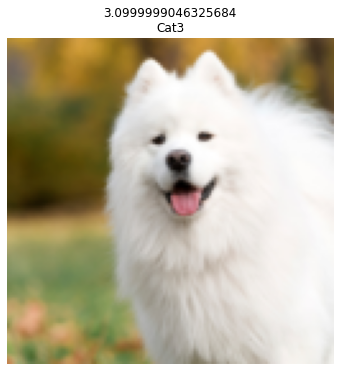

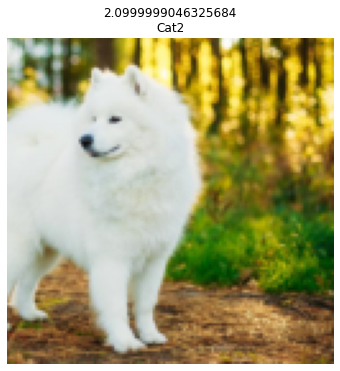

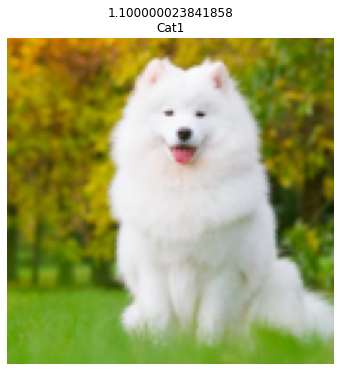

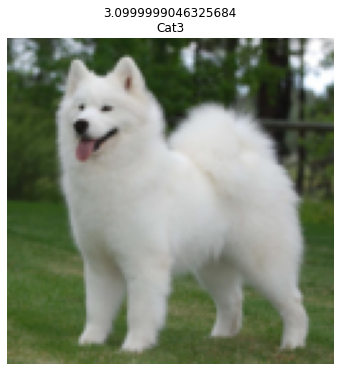

In [5]:
dls.show_batch(max_n=4, figsize=(12,6))

In [6]:
dsets[0]

(TensorImage([[[0.8706, 0.8627, 0.8392,  ..., 0.6078, 0.5569, 0.5255],
          [0.8706, 0.8706, 0.8314,  ..., 0.6000, 0.5412, 0.5020],
          [0.8471, 0.8510, 0.8000,  ..., 0.5686, 0.5294, 0.5020],
          ...,
          [0.4431, 0.4392, 0.4353,  ..., 0.4275, 0.4353, 0.4314],
          [0.4392, 0.4353, 0.4353,  ..., 0.4314, 0.4471, 0.4392],
          [0.4353, 0.4275, 0.4314,  ..., 0.4392, 0.4471, 0.4549]],
 
         [[0.6235, 0.5725, 0.5529,  ..., 0.6000, 0.5725, 0.5608],
          [0.6235, 0.5922, 0.5608,  ..., 0.5882, 0.5529, 0.5255],
          [0.6000, 0.5843, 0.5451,  ..., 0.5608, 0.5490, 0.5255],
          ...,
          [0.6549, 0.6510, 0.6549,  ..., 0.5961, 0.5922, 0.5882],
          [0.6510, 0.6510, 0.6510,  ..., 0.6000, 0.6039, 0.5961],
          [0.6431, 0.6431, 0.6471,  ..., 0.6078, 0.6078, 0.6157]],
 
         [[0.0039, 0.0078, 0.0118,  ..., 0.0078, 0.0000, 0.0000],
          [0.0078, 0.0235, 0.0118,  ..., 0.0118, 0.0000, 0.0039],
          [0.0118, 0.0392, 0.0235, 

In [7]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [8]:
learn.show_training_loop()

Start Fit
   - begin_fit      : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - begin_epoch    : [Recorder, ProgressCallback]
    Start Train
       - begin_train    : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - begin_batch    : []
         - after_pred     : []
         - after_loss     : []
         - after_backward : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - begin_validate : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop
   - after_cancel_epoch: []
   - after_epo

In [4]:
dblock = DataBlock(
  blocks=(ImageBlock,
          CategoryBlock,
          RegressionBlock,
          #TextBlock,
          MultiCategoryBlock),      
  getters=[ColReader('Image', pref=img_path, suff='.jpg'), # Image
           ColReader('CatVar'),                            # CatVar
           ColReader('NumVar'),                            # NumVar
           #ColReader('TextVar'),                          # TextVar
           ColReader('MultiCatVar', label_delim=' ')],     # MultiCatVar
  n_inp = 3,                                               # Set the number of inputs
  splitter=RandomSplitter(0.3, seed=42),                   # train/validation split
  item_tfms=[FlipItem(p=0.5), Resize(224)]
# batch_tfms=
)

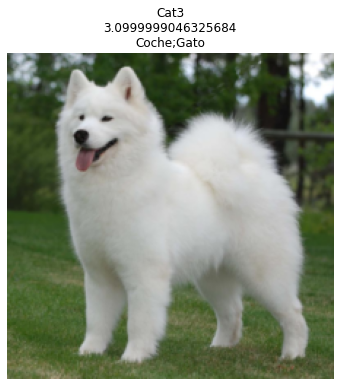

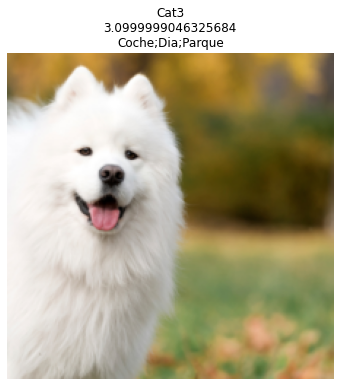

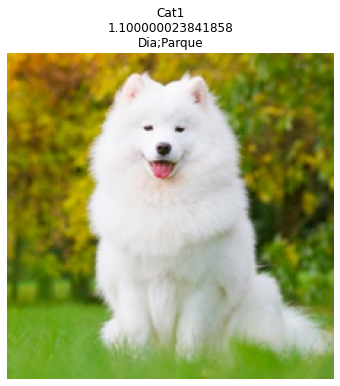

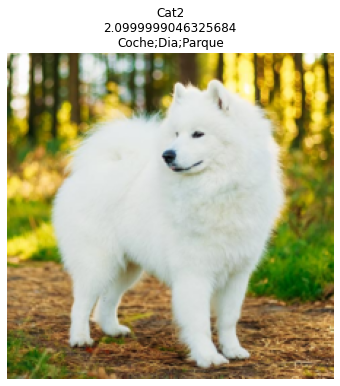

In [5]:
dls = dblock.dataloaders(df, bs=bs)                        # Create the dataloaders
dls.show_batch(max_n=4, figsize=(12,6))

In [19]:
dblock.summary(df)

Setting-up type transforms pipelines
0  img1   Cat1     1.1  Este es el texto 1        Parque Dia
1  img2   Cat2     2.1  Este es el texto 2  Parque Dia Coche
2  img3   Cat3     3.1  Este es el texto 3        Gato Coche
3  img4   Cat3     3.1  Este es el texto 4  Parque Dia Coche
4  img5   Cat3     3.1  Este es el texto 5        Gato Coche
Found 5 items
2 datasets of sizes 4,1
Setting up Pipeline: ColReader -> PILBase.create
Setting up Pipeline: ColReader -> Categorize
Setting up Pipeline: ColReader -> RegressionSetup
Setting up Pipeline: ColReader -> MultiCategorize -> OneHotEncode

Building one sample
  Pipeline: ColReader -> PILBase.create
    starting from
      Image                        img5
CatVar                       Cat3
NumVar                        3.1
TextVar        Este es el texto 5
MultiCatVar            Gato Coche
Name: 4, dtype: object
    applying ColReader gives
      imgs/img5.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=800x819
  Pipeline: 

In [6]:
from albumentations import ShiftScaleRotate

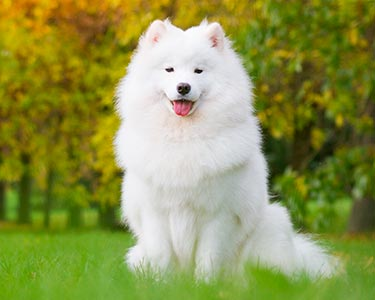

In [7]:
img = PILImage.create("imgs/img1.jpg")
img

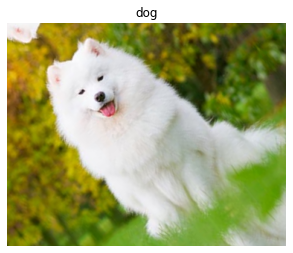

In [16]:
class AlbumentationsTransform(Transform):
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)
    
tfm = AlbumentationsTransform(ShiftScaleRotate(p=1))
a,b = tfm((img, 'dog'))
show_image(a, title=b);